<div style="color:red" >

Codigo bases

</div>

In [5]:
# %pip install arch

###  Importar librerías necesarias

In [6]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from arch.unitroot import PhillipsPerron
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import jarque_bera
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.gofplots import qqplot
from statsmodels.sandbox.stats.runs import runstest_1samp
import warnings
warnings.filterwarnings("ignore")


In [7]:
# Cargar los datos

In [8]:
url = "https://github.com/Wilsonsr/Series-de-Tiempo/raw/main/Data/Caffeine.csv"
df = pd.read_csv(url)
df


,Unnamed: 0,x
0,1,0.429
1,2,0.443
2,3,0.451
3,4,0.455
4,5,0.440
...,...,...
173,174,0.393
174,175,0.394
175,176,0.389
176,177,0.391


In [9]:
df = df.drop(columns=['Unnamed: 0'])
print(df)

         x
0    0.429
1    0.443
2    0.451
3    0.455
4    0.440
..     ...
173  0.393
174  0.394
175  0.389
176  0.391
177  0.385

[178 rows x 1 columns]


In [10]:
Fecha = pd.date_range(start='1/1/2000', periods=len(df), freq='D')

In [11]:
df["Fecha"] = Fecha
df.set_index("Fecha", inplace=True)

# Convertir la serie en un objeto de serie de tiempo
z1 = df["x"]

# Resumen de la serie
print(z1.describe())


count    178.000000
mean       0.405500
std        0.016931
min        0.359000
25%        0.393000
50%        0.404000
75%        0.417000
max        0.455000
Name: x, dtype: float64


In [12]:
df

,x
Fecha,
2000-01-01,0.429
2000-01-02,0.443
2000-01-03,0.451
2000-01-04,0.455
2000-01-05,0.440
...,...
2000-06-22,0.393
2000-06-23,0.394
2000-06-24,0.389


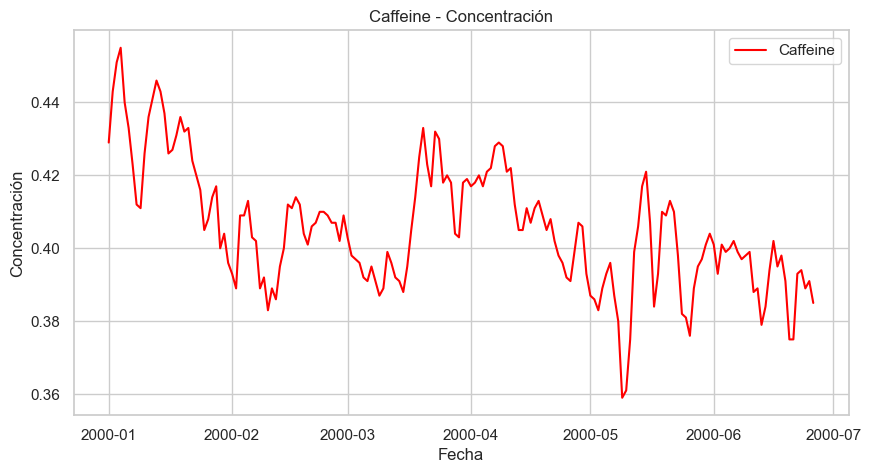

In [13]:
sns.set_theme(style="whitegrid")
# Graficar la serie original
plt.figure(figsize=(10,5))
plt.plot(z1, color="red", label="Caffeine")
plt.title("Caffeine - Concentración")
plt.xlabel("Fecha")
plt.ylabel("Concentración")
plt.legend()
plt.grid(True)
plt.show()



In [14]:
import hvplot.pandas

# Función de autocorrelación y autocorrelación parcial

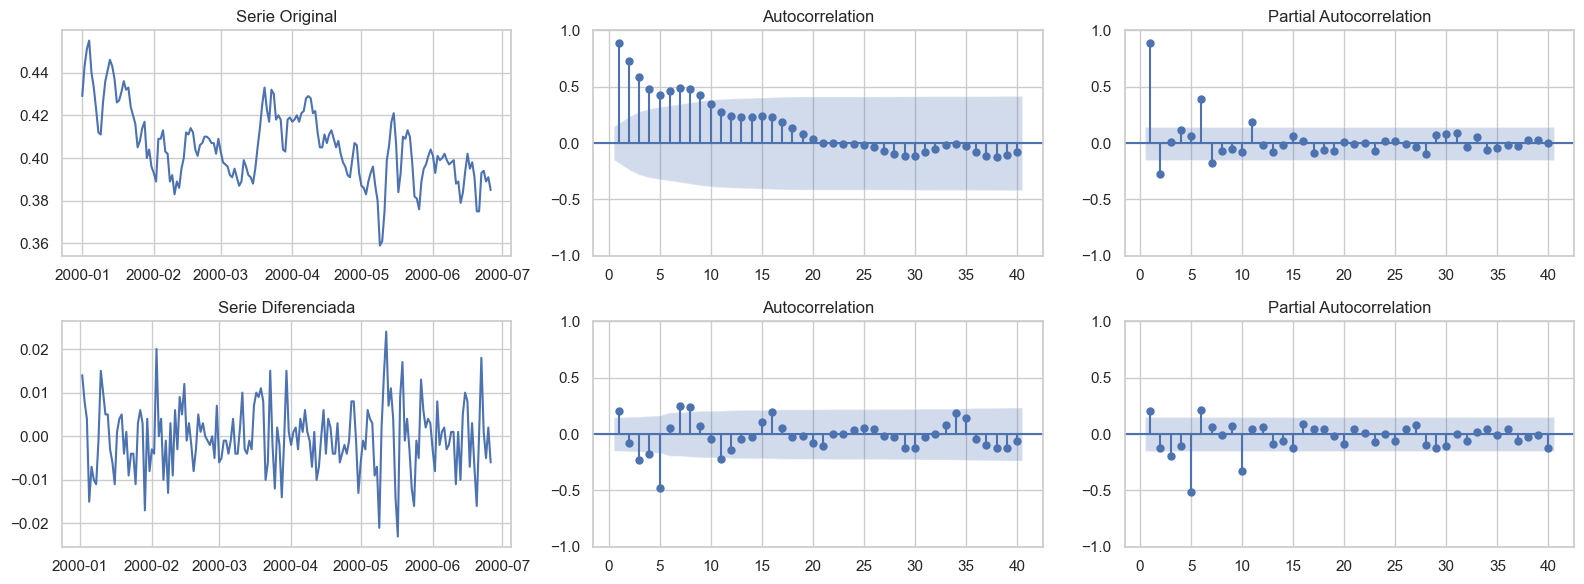

In [15]:
fig, ax = plt.subplots(2, 3, figsize=(16, 6))
ax[0, 0].plot(z1)
ax[0, 0].set_title("Serie Original")
plot_acf(z1, ax=ax[0, 1], lags=40, zero=False)
plot_pacf(z1, ax=ax[0, 2], lags=40, zero=False)
ax[1, 0].plot(z1.diff().dropna())
ax[1, 0].set_title("Serie Diferenciada")
plot_acf(z1.diff().dropna(), ax=ax[1, 1], lags=40,  zero=False)
plot_pacf(z1.diff().dropna(), ax=ax[1, 2], lags=40, zero=False)

plt.tight_layout()
plt.show()


# Pruebas de raíz unitaria

In [16]:

print("Prueba de Dickey-Fuller (ADF) - Serie Original:")
adf_result = adfuller(z1, autolag="AIC", maxlag=5)
print(f"ADF Statistic: {adf_result[0]}")
print(f"P-Value: {adf_result[1]}")


Prueba de Dickey-Fuller (ADF) - Serie Original:
ADF Statistic: -1.9556223104656483
P-Value: 0.3063635089789855


In [17]:

print("\nPrueba de Phillips-Perron (PP) - Serie Original:")
pp_result = PhillipsPerron(z1)
print(f"PP Statistic: {pp_result.stat}")
print(f"P-Value: {pp_result.pvalue}")



Prueba de Phillips-Perron (PP) - Serie Original:
PP Statistic: -2.7923520137701217
P-Value: 0.05937456034895007


In [18]:

# Diferenciación de la serie
z1_diff = z1.diff().dropna()

print("\nPrueba de Dickey-Fuller (ADF) - Serie Diferenciada:")
adf_result_diff = adfuller(z1_diff)
print(f"ADF Statistic: {adf_result_diff[0]}")
print(f"P-Value: {adf_result_diff[1]}")



Prueba de Dickey-Fuller (ADF) - Serie Diferenciada:
ADF Statistic: -5.9415385694862595
P-Value: 2.254860125149353e-07


In [19]:


print("\nPrueba de Phillips-Perron (PP) - Serie Diferenciada:")
pp_result_diff = PhillipsPerron(z1_diff)
print(f"PP Statistic: {pp_result_diff.stat}")
print(f"P-Value: {pp_result_diff.pvalue}")



Prueba de Phillips-Perron (PP) - Serie Diferenciada:
PP Statistic: -11.70783204887231
P-Value: 1.5138953153943566e-21


In [20]:
best_model =ARIMA(z1, order=(5, 1, 0)).fit()

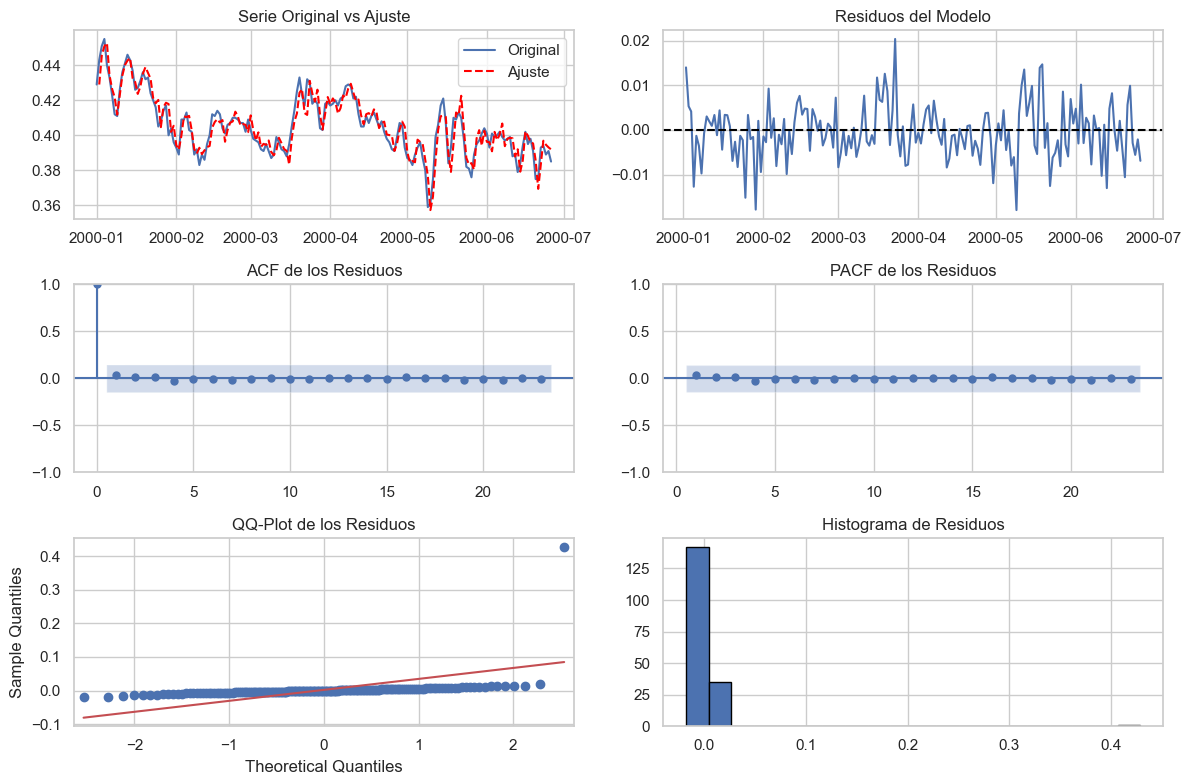

In [21]:


# Diagnóstico del modelo
residuals = best_model.resid

# Graficar residuos
fig, ax = plt.subplots(3, 2, figsize=(12, 8))
ax[0, 0].plot(z1, label="Original")
ax[0, 0].plot(best_model.fittedvalues[1:], color="red", linestyle="dashed", label="Ajuste")
ax[0, 0].set_title("Serie Original vs Ajuste")
ax[0, 0].legend()

ax[0, 1].plot(residuals[1:], label="Residuos")
ax[0, 1].set_title("Residuos del Modelo")
ax[0, 1].axhline(0, color="black", linestyle="dashed")

plot_acf(residuals, ax=ax[1, 0])
ax[1, 0].set_title("ACF de los Residuos")

plot_pacf(residuals, ax=ax[1, 1], zero=False)
ax[1, 1].set_title("PACF de los Residuos")

qqplot(residuals, line='s', ax=ax[2, 0])
ax[2, 0].set_title("QQ-Plot de los Residuos")

ax[2, 1].hist(residuals, bins=20, edgecolor="black")
ax[2, 1].set_title("Histograma de Residuos")

plt.tight_layout()
plt.show()


In [22]:
for i in range(1, 15):
    # Prueba de Ljung-Box
    p_value = acorr_ljungbox(residuals, lags=[i], return_df=True)
    print(f"P-Value para {i} rezagos: {p_value}")

P-Value para 1 rezagos:     lb_stat  lb_pvalue
1  0.249412   0.617489
P-Value para 2 rezagos:     lb_stat  lb_pvalue
2  0.293211   0.863635
P-Value para 3 rezagos:     lb_stat  lb_pvalue
3  0.315842   0.957022
P-Value para 4 rezagos:     lb_stat  lb_pvalue
4  0.431919   0.979781
P-Value para 5 rezagos:     lb_stat  lb_pvalue
5  0.444986      0.994
P-Value para 6 rezagos:     lb_stat  lb_pvalue
6  0.447015   0.998425
P-Value para 7 rezagos:     lb_stat  lb_pvalue
7  0.509143   0.999412
P-Value para 8 rezagos:     lb_stat  lb_pvalue
8  0.511075   0.999855
P-Value para 9 rezagos:     lb_stat  lb_pvalue
9  0.519454   0.999964
P-Value para 10 rezagos:      lb_stat  lb_pvalue
10  0.522095   0.999992
P-Value para 11 rezagos:      lb_stat  lb_pvalue
11  0.523585   0.999998
P-Value para 12 rezagos:      lb_stat  lb_pvalue
12  0.534858        1.0
P-Value para 13 rezagos:      lb_stat  lb_pvalue
13  0.535563        1.0
P-Value para 14 rezagos:      lb_stat  lb_pvalue
14  0.550072        1.0


In [23]:

# Prueba de Ljung-Box (Autocorrelación en residuos)
lb_test = acorr_ljungbox(residuals, lags=[2], return_df=True)
print("\nPrueba de Ljung-Box para Autocorrelación de Residuos:")
print(lb_test)



Prueba de Ljung-Box para Autocorrelación de Residuos:
    lb_stat  lb_pvalue
2  0.293211   0.863635


In [24]:

# Prueba de Normalidad de Jarque-Bera
jb_stat, jb_pvalue = jarque_bera(residuals)
print("\nPrueba de Normalidad de Jarque-Bera:")
print(f"Estadístico: {jb_stat}, P-valor: {jb_pvalue}")



Prueba de Normalidad de Jarque-Bera:
Estadístico: 196194.7443108362, P-valor: 0.0


In [25]:


# Prueba de Aleatoriedad (Runs Test)
runs_stat, runs_pvalue = runstest_1samp(residuals, correction=True)
print("\nPrueba de Aleatoriedad (Runs Test):")
print(f"Estadístico: {runs_stat}, P-valor: {runs_pvalue}")



Prueba de Aleatoriedad (Runs Test):
Estadístico: -2.017639340658564, P-valor: 0.04362883653172705


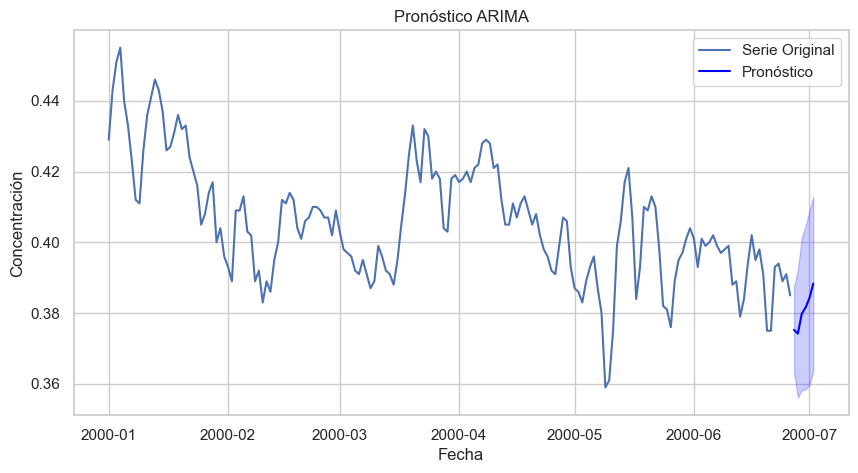

In [26]:

# Pronóstico del modelo
forecast_horizon = 6
forecast_result = best_model.get_forecast(steps=forecast_horizon)
forecast_mean = forecast_result.predicted_mean
forecast_ci = forecast_result.conf_int()

# Graficar el pronóstico
plt.figure(figsize=(10, 5))
plt.plot(z1, label="Serie Original")
plt.plot(forecast_mean, color="blue", label="Pronóstico")
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color="blue", alpha=0.2)
plt.title("Pronóstico ARIMA")
plt.xlabel("Fecha")
plt.ylabel("Concentración")
plt.legend()
plt.grid(True)
plt.show()


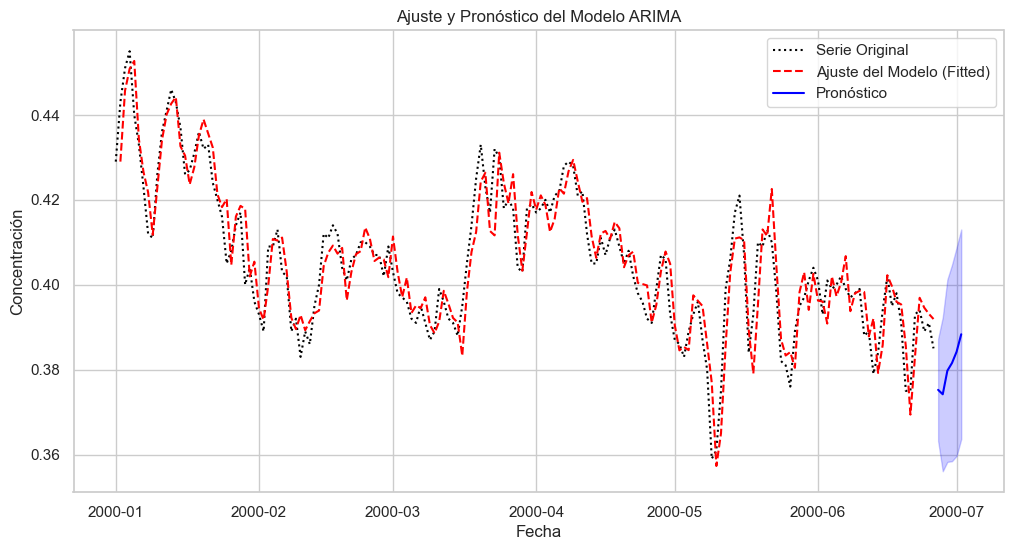

In [27]:
import matplotlib.pyplot as plt

# Horizonte de pronóstico
forecast_horizon = 6
forecast_result = best_model.get_forecast(steps=forecast_horizon)
forecast_mean = forecast_result.predicted_mean
forecast_ci = forecast_result.conf_int()

# Obtener valores ajustados del modelo
fitted_values = best_model.fittedvalues  # Valores ajustados del modelo

# Crear la gráfica
plt.figure(figsize=(12, 6))
plt.plot(z1, label="Serie Original", color="black", linestyle="dotted")
plt.plot(fitted_values[1:], color="red", linestyle="dashed", label="Ajuste del Modelo (Fitted)")
plt.plot(forecast_mean, color="blue", label="Pronóstico")
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color="blue", alpha=0.2)

# Configuración de la gráfica
plt.title("Ajuste y Pronóstico del Modelo ARIMA")
plt.xlabel("Fecha")
plt.ylabel("Concentración")
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()


In [28]:
best_model.fittedvalues

Fecha
2000-01-01    0.000000
2000-01-02    0.429000
2000-01-03    0.445694
2000-01-04    0.450866
2000-01-05    0.452717
                ...   
2000-06-22    0.383113
2000-06-23    0.396918
2000-06-24    0.394594
2000-06-25    0.393126
2000-06-26    0.391918
Length: 178, dtype: float64